Необходимо построить минимум 5 визуализации различных видов по выбранным данным, используя хотя бы две из рассмотренных на занятии библиотек.

Для каждой визуализации описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и какие гипотезы на ее основе можно выдвинуть.

Откуда брать данные?

Можно взять свой датасет (тогда не забудьте его выложить на github вместе с ноутбуком) или воспользоваться любым понравившемся из открытых источников (например, kaggle.com). Если идей нет, можете взять один из перечисленных ниже:

Данные IMDB;

Данные NYC;

Данные NBA.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sb

In [4]:
# увеличиваем размер графиков

from pylab import rcParams
rcParams['figure.figsize'] = 10,7

In [5]:
# взят датасет Boston_housing (на kaggle.com, также выложен на github)

df_boston = pd.read_csv('boston_housing.csv')
df_boston.tail(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [6]:
# общая информация о датасете

df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
# справочно: какие данные содержатся в столбцах

description = pd.DataFrame(
    {
        'название': ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'], 
        'описание': ['уровень преступности', 'доля жилой земли (для уч-в более 25000 кв.фут.)', 'доля не розничных торговых площадей', '"реки Чарльза" (1, если место граничит с рекой)', 'концентрация в воздухе оксидов азота', 'среднее количество комнат в доме', 'доля занятых объектов, построенных до 1940 года', 'средневзвеш. расстояние до 5 центров занятости', 'индекс доступности к радиальным магистралям', 'налог на имущество за каждые 10 тыс.$ США', 'соотношение учеников и учителей в местности', 'доля чернокожих (расчетная величина)', 'процент населения низкого социального статуса', 'средняя стоимость домов в тыс.$']
    }
)
description


,название,описание
0,crim,уровень преступности
1,zn,доля жилой земли (для уч-в более 25000 кв.фут.)
2,indus,доля не розничных торговых площадей
3,chas,"""реки Чарльза"" (1, если место граничит с рекой)"
4,nox,концентрация в воздухе оксидов азота
5,rm,среднее количество комнат в доме
6,age,"доля занятых объектов, построенных до 1940 года"
7,dis,средневзвеш. расстояние до 5 центров занятости
8,rad,индекс доступности к радиальным магистралям
9,tax,налог на имущество за каждые 10 тыс.$ США


Для первого графика берем данные по количеству комнат в домах. Т.к. это среднее количество комнат, для более понятного распределения приводим каждое значение к целому типу.

Группируем массив по числу комнат и считаем количество значений. Строим круговую диаграмму.

In [8]:
df_boston['rooms'] = df_boston['rm'].apply(lambda x: round(x))

df_rm = df_boston.groupby('rooms').count()[['medv']]
df_rm.columns = ['quantity_houses']

Text(0.5, 1.0, 'Distribution of houses by the number of rooms')

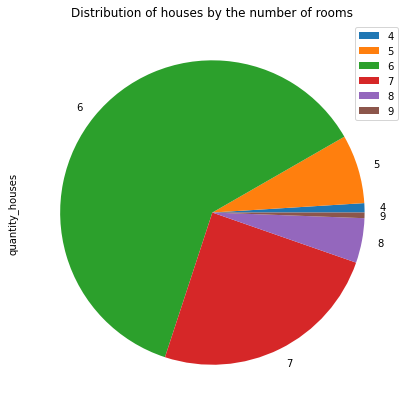

In [9]:
df_rm.plot(kind='pie', y='quantity_houses')
plt.title('Distribution of houses by the number of rooms')

График наглядно показывает распределение домов на рынке жилья по количеству комнат. Больше половины всех предложений домов - с 6-тью комнатами, менее четверти рынка составляют дома с 7-ю комнатами. Можно предположить, что дома именно с таким количеством комнат пользуются наибольшим спросом у жителей Бостона.

Для анализа влияния факторов на стоимость жилья можно будет взять данные по наиболее популярным 6-ти комнатным домам.

Для второго графика берем данные по количеству комнат и индексу удаленности от магистралей: хотим посмотреть как расположены дома в "географическом" плане.

Используемые данные принадлежат к целому типу. Делаем группировку по индексу и числу комнат и считаем количество значений. Строим линейный график. 

In [10]:
df_rad = df_boston[['rad', 'rooms', 'medv']]
df_rad.columns = ['highway_index', 'rooms', 'quantity']

df_rad = df_rad.groupby(['highway_index', 'rooms']).count()

df_rad = df_rad.unstack('rooms').fillna(0)

Text(0, 0.5, 'quantity_houses')

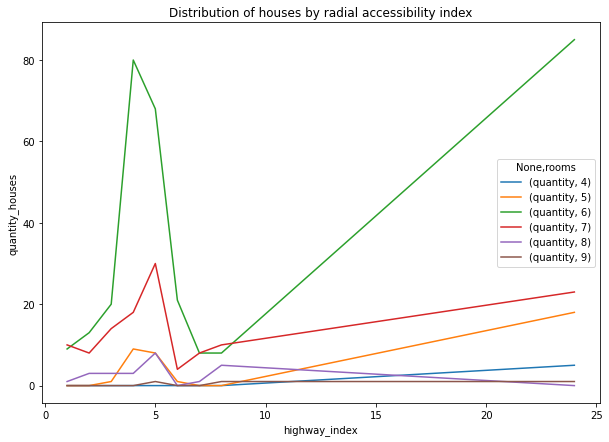

In [11]:
df_rad.plot()
plt.title('Distribution of houses by radial accessibility index')
plt.ylabel('quantity_houses')

График отражает два показателя:

1) индекс доступности к радиальным магистралям - на каком удалении от шоссе сосредоточены постройки домов: индекс удаленности от 1 до 8 и 24 (без дополнительных интервалов между последними значениями). Возможно, далеко построен какой-то коттеджный поселок как летняя дача, чтобы уехать на длительный срок и часто не возвращаться в город, а возможно, это район новой жилой застройки, куда еще не "подвели" магистральные дороги. На графике видно, что на "расстоянии" индекса 4 - 5 расположено больше всего домов.

2) распределение категорий домов по количеству спален в зависимости от удаленности магистралей. Значительная доля популярных 6-ти комнатных домов построена именно на комфортном удалении от магистралей (индекс 4 - 5), а также в районе "летних дач"/новостройки.

Для третьего графика берем данные по количеству комнат и стоимости домов - интересны средние цены на дома в зависимости от числа комнат.

Данные по комнатам представлены в целом формате, цены домов - дробные. Делаем группировку по количеству комнат и считаем средние значения. Строим столбчатый график.

In [12]:
df_medv = df_boston[['rooms', 'medv']]
df_medv.columns = ['rooms', 'average_cost']

df_medv = df_medv.groupby('rooms').mean().reset_index()

Text(0.5, 1.0, 'Average cost of houses depending on the number of rooms')

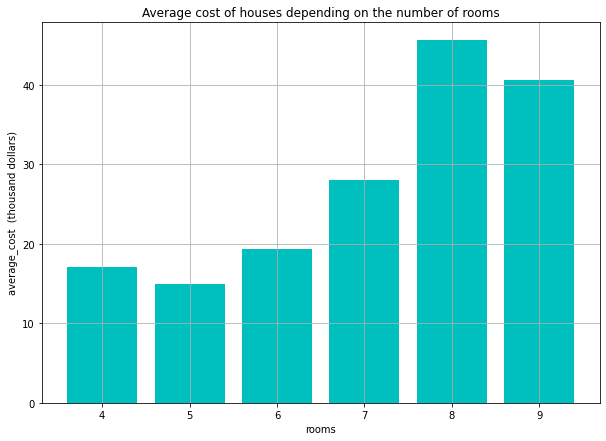

In [13]:
plt.bar(df_medv['rooms'], df_medv['average_cost'], color = "c")
plt.xlabel('rooms')
plt.ylabel('average_cost  (thousand dollars)')
plt.grid()
plt.title('Average cost of houses depending on the number of rooms')

График наглядно показывает среднюю стоимость домов в зависимости от количества спален. Примечательно, что стоимость 4-х комнатных домов близка к средней цене 6-ти комнатных, в то время как последние почти на 10 тыс.$ меньше средней стоимости 7-ми комнатных.

Приемлемость средней цены домов с 6-тью комнатами подтверждает и спрос на них: именно эта категория домов занимает львиную долю на рынке жилья.

Для четвертого графика - влияние "неблагоприятных" факторов на цены домов - берем следующие данные (все значения дробные): уровень преступности, доля загрязнения воздуха, доля населения низкого социального статуса и стоимость домов.

Строи парные графики.

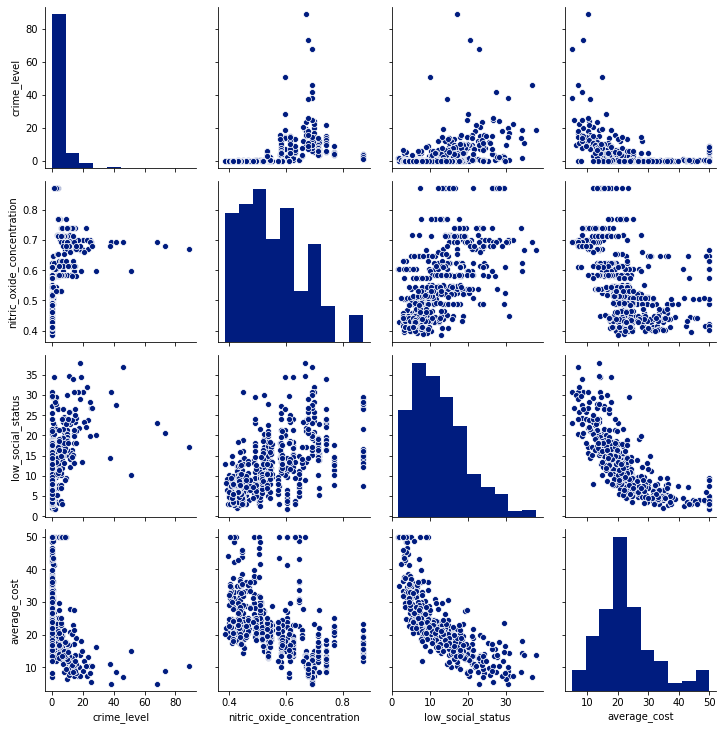

In [14]:
negative_factors = df_boston[['crim', 'nox', 'lstat', 'medv']]

negative_factors.columns = ['crime_level', 'nitric_oxide_concentration', 'low_social_status', 'average_cost']

sb.set_palette('dark')

sb.pairplot(negative_factors)

График показывает как на стоимость квартир влияют "неблагоприятные" факторы: уровень преступности, концентрация в воздухе вредных веществ (обобщенное название - оксид азота) и доля людей низкого социального статуса, проживающих в конкретном районе.

Наглядно подтверждается тот факт, что в районах с повышенным уровнем преступности и высокой долей людей низкого статуса стоимость квартир сравнительно низкая. И наоборот.

С выбросами в атмосферу не так всё однозначно, хотя дома с высокой стоимостью явно расположены в более экологичной местности.

Примечательно, что уровень преступности не связан с долей населения низкого социального статуса (по данным рассматриваемого датасета).

Для пятого графика берем данные по стоимости домов с 6-тью комнатами - ближе посмотрим на разброс цен на самые популярные дома.

Количество комнат - целые числа, цены - дробные. Строим график "ящик с усами".

In [15]:
df_six = df_boston.loc[df_boston['rooms'] == 6][['medv']]
df_six.columns = ['cost']

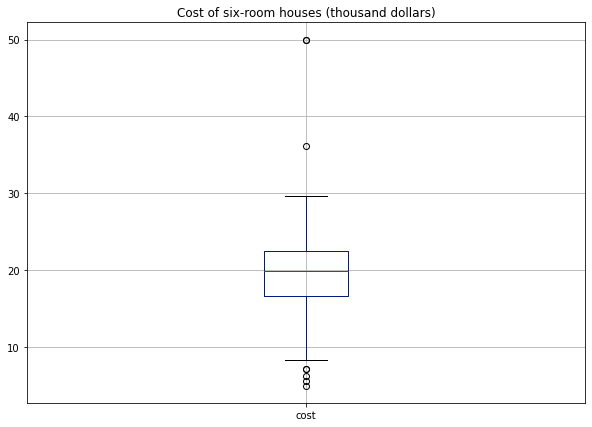

In [16]:
df_six.plot(kind='box')
plt.title('Сost of six-room houses (thousand dollars)')
plt.grid()

График показывает диапазон цен на наиболее распространенные дома - 6-ти комнатные. В минимальную (в районе 5 тыс.долларов) и максимальную стоимость (50 тыс.долларов) оценено совсем незначительное количенство домов (выбросы на графике). Вполне вероятно, что первые расположены рядом с шумной магистралью или в социально неблагополучной местности и дома нуждаются в капитальном ремонте. У вторых, возможно, в стоимость дома включили дорогой ремонт и внутреннее оборудование техникой.

В целом, разброс цен на дома данной категории весьма приемлемый: в подавляющем большинстве стоимость варьируется от 16 до 23 тыс. долларов (с 25 по 75 процентили).

На шестом графике рассмотрим влияние различных факторов на стоимость 6-ти комнатных домов в ранее определенном ценовом диапазоне - от 16 до 23 тыс. долларов.

Для лучшей визуализации не будем использовать данные по размеру налога и доле чернокожих: разрядность этих значений не сопоставима со значениями других показателей.

Также не будут учтены данные по доле занятых объектов, построенных до 1940 года: отдельный расчет средних значений показал, что чем эта доля ниже, то есть в районе построены относительно новые дома, тем выше стоимость жилья.

Таким образом, в расчет будут взяты 9 показателей (их описание продублировано ниже).

Значения стоимости жилья имеют тип float, для целей группировки переведем их в целый тип (int). Оставим только те строки массива данных, которые соответствуют количеству комнат в доме, равном 6, при общей стоимости жилья в диапазоне от 16 до 23 тыс. долларов. Сгруппируем данные по цене домов, расчитаем средние значения и построим график - "тепловую карту".

In [17]:
df_boston['cost'] = df_boston['medv'].astype('int64')
cost_list = [16, 17, 18, 19, 20, 21, 22, 23]

df_b = df_boston.loc[df_boston['rooms'] == 6]

df_b = (df_b
        .loc[df_boston['cost'].isin(cost_list)]
        .groupby('cost')
        .mean()
        .sort_values(by='cost', ascending=False)
        [['crim', 'zn', 'indus', 'chas', 'nox', 'dis', 'rad', 'ptratio', 'lstat']]
       )

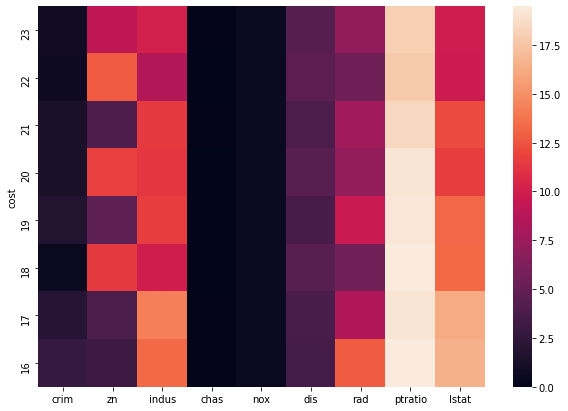

In [18]:
sb.heatmap(df_b)

In [19]:
# описание столбцов для графика
description_heatmap = pd.DataFrame(
    {
        'название': ['crim', 'zn', 'indus', 'chas', 'nox', 'dis', 'rad', 'ptratio', 'lstat'], 
        'описание': ['уровень преступности', 'доля жилой земли (для уч-в более 25000 кв.фут.)', 'доля не розничных торговых площадей', '"реки Чарльза" (1, если место граничит с рекой)', 'концентрация в воздухе оксидов азота', 'средневзвеш. расстояние до 5 центров занятости', 'индекс доступности к радиальным магистралям', 'соотношение учеников и учителей в местности', 'процент населения низкого социального статуса']
    }
)
description_heatmap

,название,описание
0,crim,уровень преступности
1,zn,доля жилой земли (для уч-в более 25000 кв.фут.)
2,indus,доля не розничных торговых площадей
3,chas,"""реки Чарльза"" (1, если место граничит с рекой)"
4,nox,концентрация в воздухе оксидов азота
5,dis,средневзвеш. расстояние до 5 центров занятости
6,rad,индекс доступности к радиальным магистралям
7,ptratio,соотношение учеников и учителей в местности
8,lstat,процент населения низкого социального статуса


График позволяет сформировать возможный перечень показателей для построения модели предсказания цен на жилье. Явно, что туда не будут включены "реки Чарльза" (весьма условный показатель), а также уровень загрязнения воздуха (значения неоднозначны, как было показано ранее). Остальные показатели, благодаря выбранному типу графика, весьма наглядно отражают разброс значений в зависимости от стоимости домов.